# Parte 1 

Este Notebook comprueba que el codigo en la tarea 2 utilizando Python2 Funciona correctamente.

In [1]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)
train_df.head()
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [2]:
from sklearn.preprocessing import StandardScaler
X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

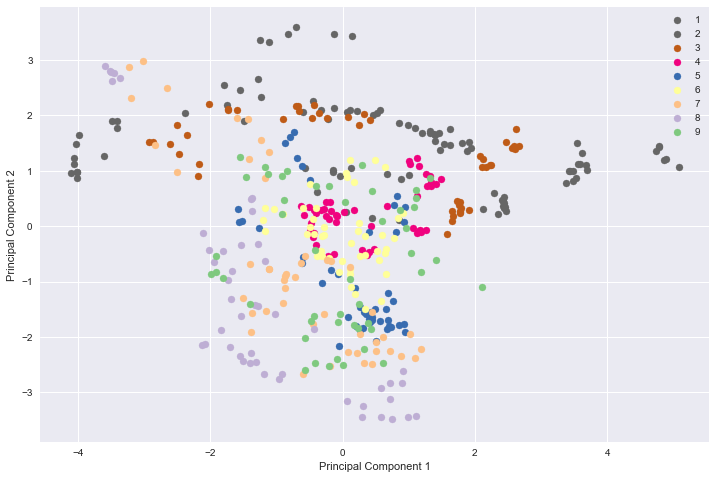

In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Accent_r')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

C:\Users\Pablo\Anaconda2\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


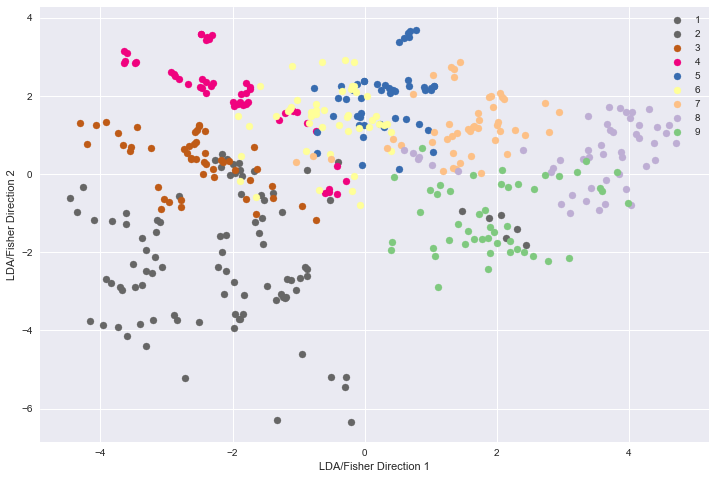

In [8]:
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Accent_r')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
                c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

C:\Users\Pablo\Anaconda2\lib\site-packages\sklearn\qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


-----LDA-----
0.683712121212
0.443722943723
-----QDA-----
0.988636363636
0.471861471861
-----KNN-----


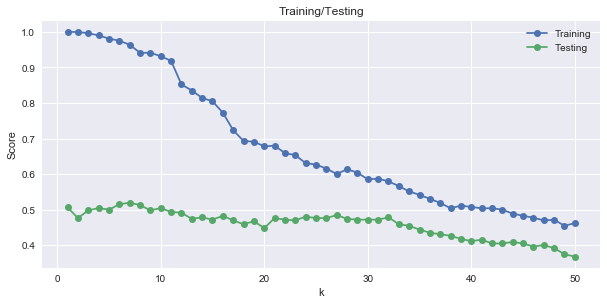

In [9]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print "-----LDA-----"
print lda_model.score(X_std,y)
print lda_model.score(X_std_test,ytest)
qda_model = QDA()
qda_model.fit(X_std,y)
print "-----QDA-----"
print qda_model.score(X_std,y)
print qda_model.score(X_std_test,ytest)
print "-----KNN-----"
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
	knn_model = KNeighborsClassifier(n_neighbors=c)
	knn_model.fit(X_std,y)
	knn_scores_training.append(knn_model.score(X_std,y))
	knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

# Parte 2

In [10]:
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print train_df.shape
print test_df.shape

(3554, 2)
(3554, 2)


In [12]:
import re, time     
from nltk.corpus import stopwords   
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
	ps = PorterStemmer()
	commonwords = stopwords.words('english')
	text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
	words = ""
	wordtokens = [ ps.stem(word.lower()) \
				for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
	for word in wordtokens: 
		if word not in commonwords:
				words+=" "+word	
	return words
print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")

 love eat cake
 love eat cake
 love eat cake
 love eat cake
 n't love eat cake


In [14]:
def word_extractor2(text):
	wordlemmatizer = WordNetLemmatizer()
	commonwords = stopwords.words('english')
	text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
	words = ""
	wordtokens = [ wordlemmatizer.lemmatize(word.lower()) \
				for word in word_tokenize(text.decode('utf-8','ignore')) ]
	for word in wordtokens: 
		if word not in commonwords:
				words+=" "+word	
	return words
print word_extractor2("I love to eat cake")
print word_extractor2("I love eating cake")
print word_extractor2("I loved eating the cake")
print word_extractor2("I do not love eating cake")
print word_extractor2("I don't love eating cake")

 love eat cake
 love eating cake
 loved eating cake
 love eating cake
 n't love eating cake


In [15]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)	
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
for tag, count in zip(vocab, dist):
    print count, tag

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

2 bogus
1 boilerplate
1 boiling
1 boisterous
3 bold
1 bolder
2 boldly
1 bolero
4 bollywood
2 bolstered
2 bomb
1 bombastic
1 bombay
1 bombing
2 bona
8 bond
1 bondish
5 bone
1 bonehead
1 bonus
2 boob
26 book
4 boom
1 boomer
1 booming
1 boorishness
1 boosted
1 boot
1 booty
2 boozy
6 border
2 bordering
1 borderline
5 bore
6 bored
1 boredom
21 boring
3 born
2 borrowed
1 borstal
1 botch
1 botched
4 bother
2 bothered
1 bothersome
2 bottom
1 bought
1 bounce
3 bouncy
5 bound
2 boundary
1 boundless
6 bourne
2 bout
5 bow
1 bowel
1 bowl
4 box
2 boxing
23 boy
2 boyd
1 boys
1 bracing
1 brady
6 brain
3 brainless
2 branagh
1 brand
1 brash
2 brass
2 brat
1 bratt
2 bratty
1 bravado
3 brave
1 braveheart
1 bravely
1 bravery
2 bravo
1 bravura
1 brawn
1 brawny
1 brazen
1 brazenly
1 bread
11 break
3 breakdown
4 breaking
1 breakingly
3 breakthrough
4 breath
3 breathes
2 breathing
1 breathless
5 breathtaking
1 breathtakingly
1 brecht
1 breckin
4 breezy
1 breitbart
3 brendan
1 brew
2 brian
2 bride
2 bridge
2 br

1 divorce
1 dixon
1 dizzily
1 dizzying
1 dj
1 djeinaba
3 do
1 doa
1 doc
1 doctor
1 doctorate
1 docu
6 document
46 documentary
1 doddering
1 dodge
1 dodgy
127 doe
14 dog
3 dogma
1 dognini
1 dogtown
1 doing
1 doldrums
1 doll
3 dollar
1 dollop
1 dolman
1 dolphin
1 doltish
4 domestic
2 dominated
1 dominates
1 domingo
1 donati
1 donde
27 done
4 dong
2 donovan
2 doo
1 dooby
1 doodled
1 doofus
3 door
2 doorstep
2 dope
2 dopey
1 doris
1 dormant
3 dos
1 dosage
3 dose
3 dot
1 doting
2 dots
5 double
1 doubling
6 doubt
1 doubting
1 doug
1 douglas
2 dour
2 dover
4 down
5 downbeat
2 downer
1 downfall
1 downhill
1 downplaying
3 downright
1 downsizing
2 downtown
1 downy
1 doyle
1 doze
1 dozen
1 dozing
3 drab
1 drably
1 drabness
1 draft
7 drag
1 dragged
1 draggin
9 dragon
3 dragonfly
2 drain
1 drained
72 drama
22 dramatic
3 dramatically
1 dramatics
1 dramatist
2 dramatization
2 dramatized
1 dramedy
1 drang
3 draw
5 drawing
4 drawn
1 dread
3 dreadful
9 dream
1 dreamed
1 dreaming
1 dreamlike
1 dreamscape

1 guarded
1 guei
2 guess
1 guessed
1 guest
1 guffaw
2 guide
1 guided
1 guiding
1 guillen
2 guilt
8 guilty
1 guise
2 guitar
1 gulp
2 gum
2 gun
1 gunfest
1 gunfight
1 gunplay
1 guns
1 gussied
4 gut
1 gutless
18 guy
1 guzmn
1 gyu
224 ha
1 haber
2 hack
1 hackery
4 hackneyed
1 hades
1 hagiographic
4 hair
1 hairdo
1 haired
1 hairline
2 hal
30 half
1 halfhearted
1 halftime
6 halfway
1 halfwit
1 hall
1 hallelujah
1 hallmark
1 halloween
2 hallucinatory
1 hallucinogenic
2 ham
1 hamfisted
1 hamilton
2 hammer
2 hampered
12 hand
11 handed
2 handedness
6 handful
1 handgun
1 handheld
1 handicap
1 handily
1 handiwork
5 handle
2 handled
1 handling
1 hands
1 handsome
6 haneke
1 hang
1 hanging
1 hank
1 hanna
1 hanussen
4 haphazard
1 hapless
3 happen
3 happened
3 happening
8 happens
3 happily
2 happiness
9 happy
1 harbor
46 hard
1 hardened
2 harder
1 hardest
9 hardly
1 hardman
2 hardware
1 hardy
1 hare
2 harm
7 harmless
1 harmon
1 harmoniously
4 harris
4 harrowing
5 harry
3 harsh
1 harshness
2 hart
3 hart

3 maintain
2 maintaining
5 maintains
1 maintenance
1 mais
1 majesty
1 majid
3 majidi
6 major
1 majority
183 make
8 maker
2 makhmalbaf
1 makin
29 making
1 malarkey
1 malcolm
4 male
1 malfitano
1 malice
4 malkovich
1 mall
1 malle
1 malleable
1 malnourished
1 malnutrition
1 malone
1 mam
1 mama
2 mamet
38 man
1 mana
5 manage
3 managed
24 manages
1 managing
1 manchild
1 mandate
1 mandy
1 mangle
4 manhattan
1 manhood
1 mania
1 maniac
1 manifestation
3 manipulation
3 manipulative
2 mann
10 manner
1 mannered
1 mannerism
1 manual
2 manufactured
56 many
1 map
1 mapquest
2 mar
1 marathon
3 marching
1 marcus
1 margarita
1 margin
2 marginal
1 margot
2 marina
1 marinated
2 marine
10 mark
1 markedly
1 marker
5 market
1 marketable
2 marketing
1 marking
1 marquee
1 marred
3 marriage
1 marries
1 marrow
1 marry
1 mart
2 martha
5 martial
4 martin
1 martyr
5 marvel
3 marvelous
1 marxian
7 mary
3 maryam
1 masala
1 masculine
3 mask
1 masked
2 masochism
2 mason
1 mass
2 massacre
1 masseur
1 massoud
13 master


1 purport
1 purported
2 purportedly
11 purpose
1 purposeful
1 purposefully
3 purposeless
1 purr
1 pursue
2 pursuing
4 push
1 pushed
2 pushing
30 put
1 putrid
2 putting
3 puzzle
3 puzzling
3 pyrotechnic
2 python
1 quaint
2 qualify
12 quality
1 quando
1 quantum
4 quarter
1 quashed
6 que
7 queen
1 quelle
1 quentin
4 quest
20 question
3 questionable
1 quibble
3 quick
2 quickie
9 quickly
11 quiet
9 quietly
1 quietude
1 quinn
1 quintessentially
2 quirk
1 quirkily
18 quirky
37 quite
2 quitting
1 quixotic
1 qutting
2 rabbit
1 raccoon
8 race
2 rachel
6 racial
2 racing
2 racism
1 radcliffe
2 radiant
3 radical
1 radioactive
1 rae
1 ragbag
2 rage
1 ragged
1 rah
1 railing
1 rain
2 rainbow
1 raindrop
4 raise
1 raised
2 raising
1 raison
1 raked
2 rally
2 ralph
3 ram
1 rama
2 ramble
3 rambling
1 ramblings
1 ramification
1 rampantly
1 rampling
4 ramsay
1 ran
2 randall
1 randolph
2 random
2 ranging
5 rank
1 ransacked
5 rap
1 rapid
2 rapidly
1 rapper
1 rapport
1 rapt
19 rare
13 rarely
1 rarest
1 rarity
1

1 striving
3 stroke
1 stroked
1 stroll
21 strong
2 stronger
2 strongest
2 strongly
1 struck
6 structure
2 structured
1 structuring
6 struggle
1 struggled
1 struggling
1 strung
1 strut
1 strutting
2 stuart
3 stuck
1 studded
4 student
6 studio
1 studiously
25 study
17 stuff
1 stuffy
1 stultifyingly
1 stumble
8 stunning
1 stunningly
10 stunt
1 stupefying
1 stupendous
13 stupid
1 stupider
1 stupidity
1 stuporously
1 sturdy
1 stuttering
34 style
1 styled
1 stylings
5 stylish
2 stylishness
3 stylistic
5 stylized
1 stymied
2 su
1 sua
2 sub
3 subconscious
3 subculture
33 subject
2 sublime
1 sublimely
1 subliminally
2 submarine
1 submerged
1 subordinate
1 subplot
1 subplots
12 substance
1 substantial
1 substitutable
3 substitute
2 subtext
1 subtexts
1 subtitle
1 subtitled
11 subtle
2 subtler
1 subtlest
4 subtlety
3 subtly
1 suburban
1 suburbia
5 subversive
6 succeed
1 succeeded
7 succeeds
8 success
9 successful
1 successfully
2 succession
2 successor
1 succumb
3 succumbs
3 suck
3 sucker
1 sucki

In [20]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,text):
	acc_tr = model.score(x,y)
	acc_test = model.score(xt[:-1],yt[:-1])
	print "Training Accuracy %s: %f"%(text,acc_tr)
	print "Test Accuracy %s: %f"%(text,acc_test)
	print "Detailed Analysis Testing Results ..."
	print(classification_report(yt, model.predict(xt), target_names=['+','-']))

In [21]:
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
	model = BernoulliNB()
	model = model.fit(x, y)
	score_the_model(model,x,y,xt,yt,"BernoulliNB")
	return model
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.958638
Test Accuracy BernoulliNB: 0.738531
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.43784511  0.56215489] although some viewers will not be able to stomach so much tongue-in-cheek weirdness , those who do will have found a cult favorite to enjoy for a lifetime .

[ 0.46159849  0.53840151] the best thing about the movie is its personable , amusing cast .

[ 0.36609847  0.63390153] it is ridiculous , of course . . . but it is also refreshing , disarming , and just outright enjoyable despite its ridiculousness .

[ 0.09791908  0.90208092] i loved the look of this film .

[ 0.34824382  0.65175618] campanella's competent direction and his excellent cast overcome the obstacles of a predictable outcome and a screenplay that glosses over rafael's ev

In [22]:
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
	Cs = [0.01,0.1,10,100,1000]
	for C in Cs:
		print "El valor de C que se esta probando: %f"%C
		model = LinearSVC(C=C)
		model = model.fit(x, y)
		score_the_model(model,x,y,xt,yt,"SVM")
do_SVM(features_train,labels_train,features_test,labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.884637
Test Accuracy SVM: 0.715170
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.989589
Test Accuracy SVM: 0.723614
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.702786
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.71      0.69      0.70      1803
          -       0.69      0.71 

# Parte 3

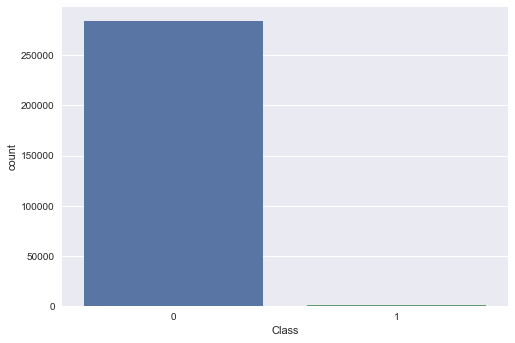

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=data)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
data["nAmount"] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [25]:
Count_Normal_transacation = len(data[data["Class"]==0])
Count_Fraud_transacation = len(data[data["Class"]==1])
def model(model,features_train,features_test,labels_train,labels_test):
	clf = model
	clf.fit(features_train,labels_train.values.ravel())
	pred=clf.predict(features_test)
	cnf_matrix=confusion_matrix(labels_test,pred)
	print "The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+
									 cnf_matrix[1,0]))
	fig= plt.figure(figsize=(6,3))
	print "TP: %d"%cnf_matrix[1,1,]
	print "TN: %d"%cnf_matrix[0,0] 
	print "FP: %d"%cnf_matrix[0,1]
	print "FN: %d"%cnf_matrix[1,0]
	sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
	plt.title("Confusion_matrix")
	plt.xlabel("Predicted_class")
	plt.ylabel("Real class")
	plt.show()
	print "\n----------Classification Report------------------------------------"
	print classification_report(labels_test,pred)
	
	''' You have to complete this function, ROC Curve is missing'''


In [26]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
	x_features= x.iloc[:,x.columns != "Class"]
	x_labels=x.iloc[:,x.columns=="Class"]
	x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
	print "Length of training data: %d"%len(x_train)
	print "Length of test data: %d"%len(x_test)
	return(x_train,x_test,y_train,y_test)

In [27]:
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
def undersample(normal_indices,fraud_indices,times):
	Normal_indices_undersample = np.array(np.random.choice(normal_indices,
	(times*Count_Fraud_transacation),replace=False))
	undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
	undersample_data = data.iloc[undersample_data,:]
	normal = (float(len(undersample_data[undersample_data.Class==0]))
	/len(undersample_data["Class"]))
	print "The normal transacation proportion is : %f"%normal
	fraud = (float(len(undersample_data[undersample_data.Class==1]))
	/len(undersample_data["Class"]))
	print "The fraud transacation proportion is : %f"%fraud
	print "Total number of record in resampled data is: %f"%len(undersample_data["Class"])
	return(undersample_data)

The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000
Total number of record in resampled data is: 984.000000

------------------------------------------------------------

The model classification for 1 proportion

Length of training data: 688
Length of test data: 296
The recall for this model is: 0.900662
TP: 136
TN: 143
FP: 2
FN: 15


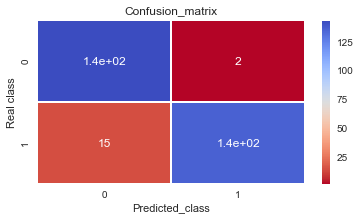


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.99      0.94       145
          1       0.99      0.90      0.94       151

avg / total       0.95      0.94      0.94       296

------------------------------------------------------------
The undersample data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333
Total number of record in resampled data is: 1476.000000

------------------------------------------------------------

The model classification for 2 proportion

Length of training data: 1033
Length of test data: 443
The recall for this model is: 0.877698
TP: 122
TN: 299
FP: 5
FN: 17


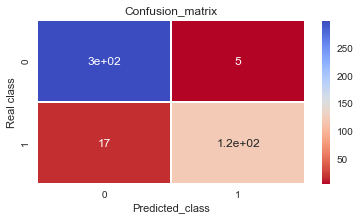


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       304
          1       0.96      0.88      0.92       139

avg / total       0.95      0.95      0.95       443

------------------------------------------------------------
The undersample data for 3 proportion

The normal transacation proportion is : 0.750000
The fraud transacation proportion is : 0.250000
Total number of record in resampled data is: 1968.000000

------------------------------------------------------------

The model classification for 3 proportion

Length of training data: 1377
Length of test data: 591
The recall for this model is: 0.901515
TP: 119
TN: 450
FP: 9
FN: 13


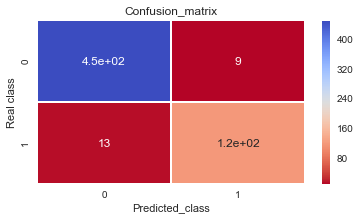


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       459
          1       0.93      0.90      0.92       132

avg / total       0.96      0.96      0.96       591

------------------------------------------------------------


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
for i in range(1,4):
	print "The undersample data for " + str(i) + " proportion\n"
	Undersample_data = undersample(normal_indices,fraud_indices,i)
	print "\n------------------------------------------------------------"
	print "\nThe model classification for " + str(i) + " proportion\n"
	under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
	clf=LogisticRegression()
	model(clf,under_x,under_xt,under_yx,under_yxt)
	print "------------------------------------------------------------"